# Data Analysis and Popularity Prediction of Spotify Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

Unnamed: 0                track_id                 artists   
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino  \
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name   
0                                             Comedy  \
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit   
0                      Comedy          73       230666     False  \
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness   
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322  \
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
df = df.drop(columns = 'Unnamed: 0')

# EDA

## Types and missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [8]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Numeric features

In [11]:
df.describe()

popularity   duration_ms   danceability         energy   
count  113999.000000  1.139990e+05  113999.000000  113999.000000  \
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness   
count  113999.000000  113999.000000  113999.000000  113999.000000  \
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence   
count  113999.000000     113999.000000  113999.000000  113999.000000  \
mean        0.314907          0.156051       0.213554       0.474066   
std         0.332522          0.309556       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.597500          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  113999.000000   113999.000000  
mean      122.147695        3.904034  
std        29.978290        0.432623  
min         0.000000        0.000000  
25%        99.218500        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [12]:
# No outliers big enough to remove

In [16]:
sns.pairplot(df.select_dtypes('number'))

In [18]:
# Some insights from the pairplot:

# Danceability:
# Danceability seems to be highest for middle tempo songs
# Very few songs have very low Danceability while having very high Valence
# No songs with very high Speechiness and very low Danceability, but also few very high/very high
# Positive correlation with loudness, altough there are songs with high Danceability & not Loud
# Seems normaloy distributed

# Duration:
# The longest songs are often around avg tempo
# Songs with high speechiness are never very long

# Energy:
# High Energy => high Loudness

# Loundness:
# High valence => not low Loudness
# Medium instrumentalness or acousticness => not low loudness
# High speechiness => not low loudness
# Higher energy => higher loudness (altough wide spread)
# 


## Cathegoric features

### Cleaning the cathegoric columns

In [13]:
# dropping track_id

In [12]:
df.drop(columns = 'track_id', inplace = True)

In [13]:
df.select_dtypes('object').columns

Index(['artists', 'album_name', 'track_name', 'track_genre'], dtype='object')

In [14]:
for col in df.select_dtypes('object').columns:
    print(len(df[col].unique()))

31437
46589
73608
114


# More EDA

In [ ]:
# Kolla genomsnittlig popularity för genres, artister osv

In [ ]:
# Kolla genomsnittlig popularity per cluster

# Unsupervised Learning

## Data Preparation

In [16]:
X = df.select_dtypes('number')
X.drop(columns = 'popularity', inplace = True)

In [17]:
X.head()

duration_ms  danceability  energy  key  loudness  mode  speechiness   
0       230666         0.676  0.4610    1    -6.746     0       0.1430  \
1       149610         0.420  0.1660    1   -17.235     1       0.0763   
2       210826         0.438  0.3590    0    -9.734     1       0.0557   
3       201933         0.266  0.0596    0   -18.515     1       0.0363   
4       198853         0.618  0.4430    2    -9.681     1       0.0526   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0        0.0322          0.000001    0.3580    0.715   87.917               4  
1        0.9240          0.000006    0.1010    0.267   77.489               4  
2        0.2100          0.000000    0.1170    0.120   76.332               4  
3        0.9050          0.000071    0.1320    0.143  181.740               3  
4        0.4690          0.000000    0.0829    0.167  119.949               4

## Setting up a pipeline

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

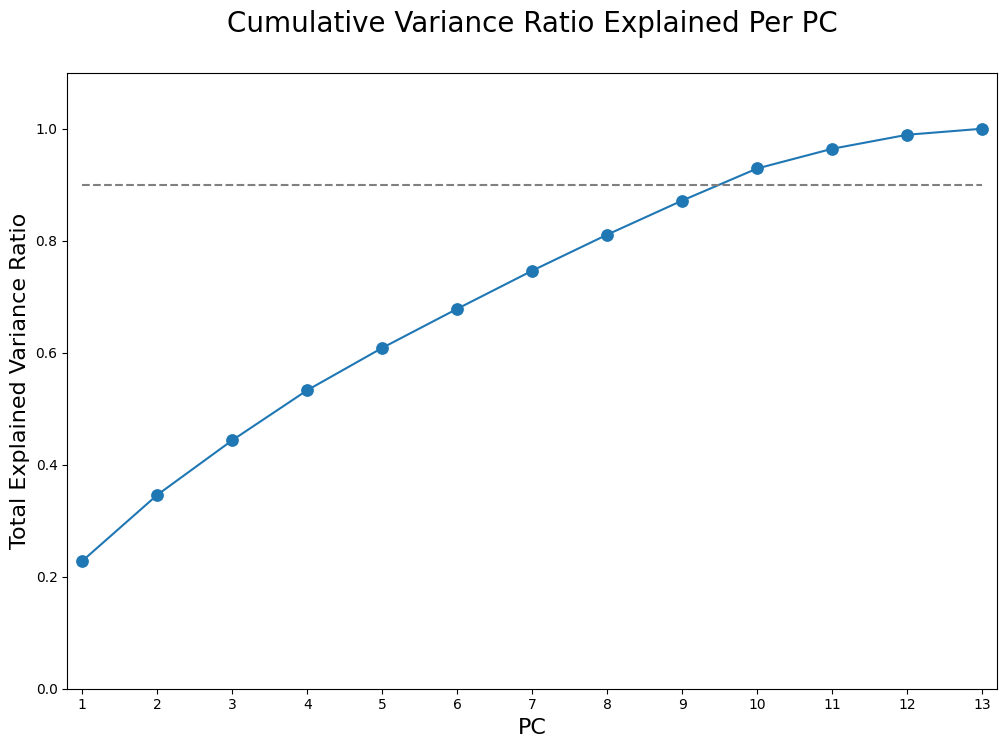

In [20]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')
plt.ylabel('Total Explained Variance Ratio', size = 16)
plt.xlabel('PC', size = 16)
plt.title('Cumulative Variance Ratio Explained Per PC\n', size = 20)

plt.savefig('PCA.png', transparent = True)
plt.show()

In [21]:
# Since I in this case want to explain at least 90% of the variance i go for 10 PCs

## KMeans

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

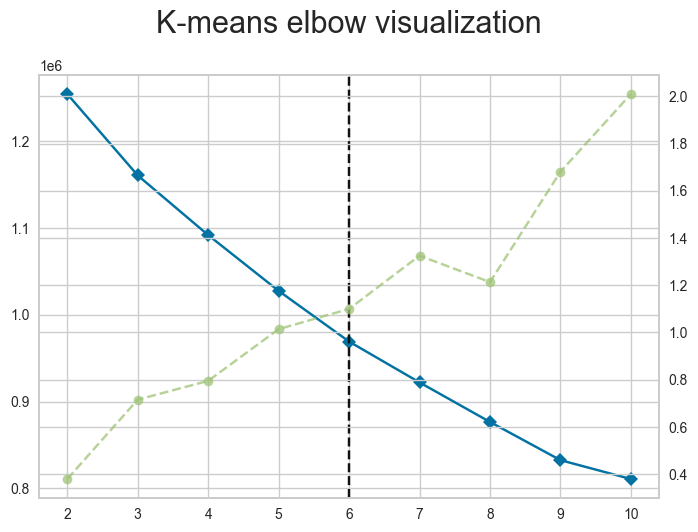

In [23]:
scaler = StandardScaler()
decomp = PCA()
cluster = KElbowVisualizer(KMeans())

pipe = make_pipeline(scaler, decomp, cluster)
pipe.fit(X)
pipe[2].show
plt.title("K-means elbow visualization\n", size = 22)
plt.savefig('kmeans.png', transparent = True)
plt.show()

In [24]:
# Therefore choosing 6 clusters for the kmeans clustering
# Inertia is the blue curve and the green curve is process time

## Creating clusters using K-means

In [25]:
# Using PCA(0.9) since that means 90% of variance explained
# Using 6 cluster for Kmeans given the elbow analysis
# Using STandardScaler given that the data is fairly normally distributed, no significant outliers

scaler = StandardScaler()
decomp = PCA(n_components = 0.9)
cluster = KMeans(n_clusters = 6)

pipe = make_pipeline(scaler, decomp, cluster)
pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=6))])

## Updating df with PCs and clusters

In [120]:
values = pipe[:2].transform(X)
pca_labels = [f"PC{idx + 1}" for idx, i in enumerate(values.T)]

df = df.join(pd.DataFrame(values, columns = pca_labels))

In [121]:
df["cluster"] = pipe["kmeans"].labels_

In [122]:
df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'cluster'],
      dtype='object')

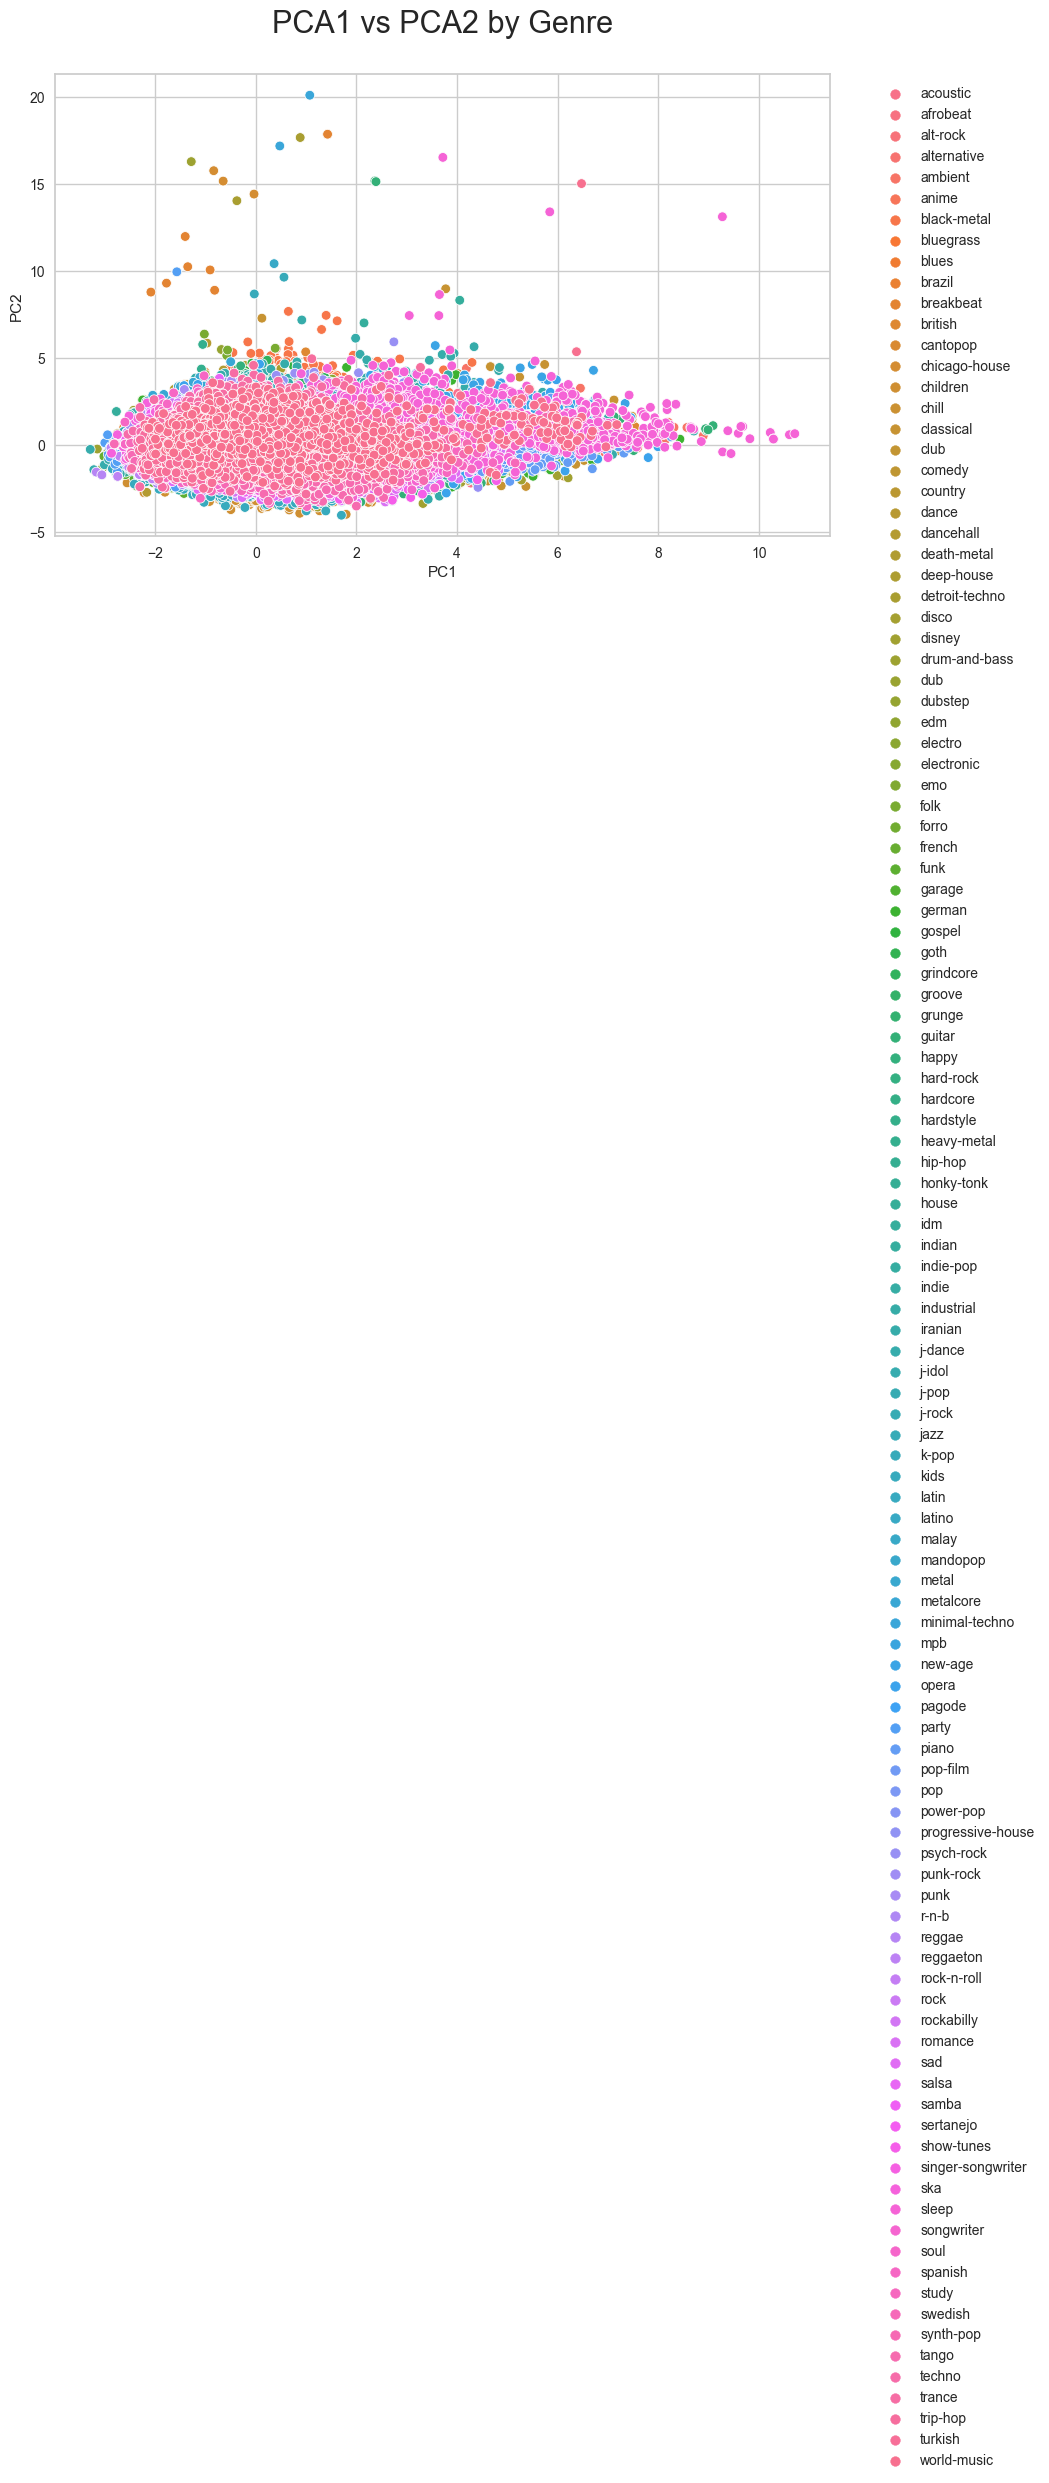

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='track_genre')
plt.title("PCA1 vs PCA2 by Genre\n", size=22)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('pca_result.png', transparent=True, bbox_inches='tight')
plt.show()

# Investigating the clusters

In [39]:
df_orig = pd.read_csv("dataset.csv")
df_orig.drop(columns = ["Unnamed: 0", "track_id", "popularity"], inplace = True)

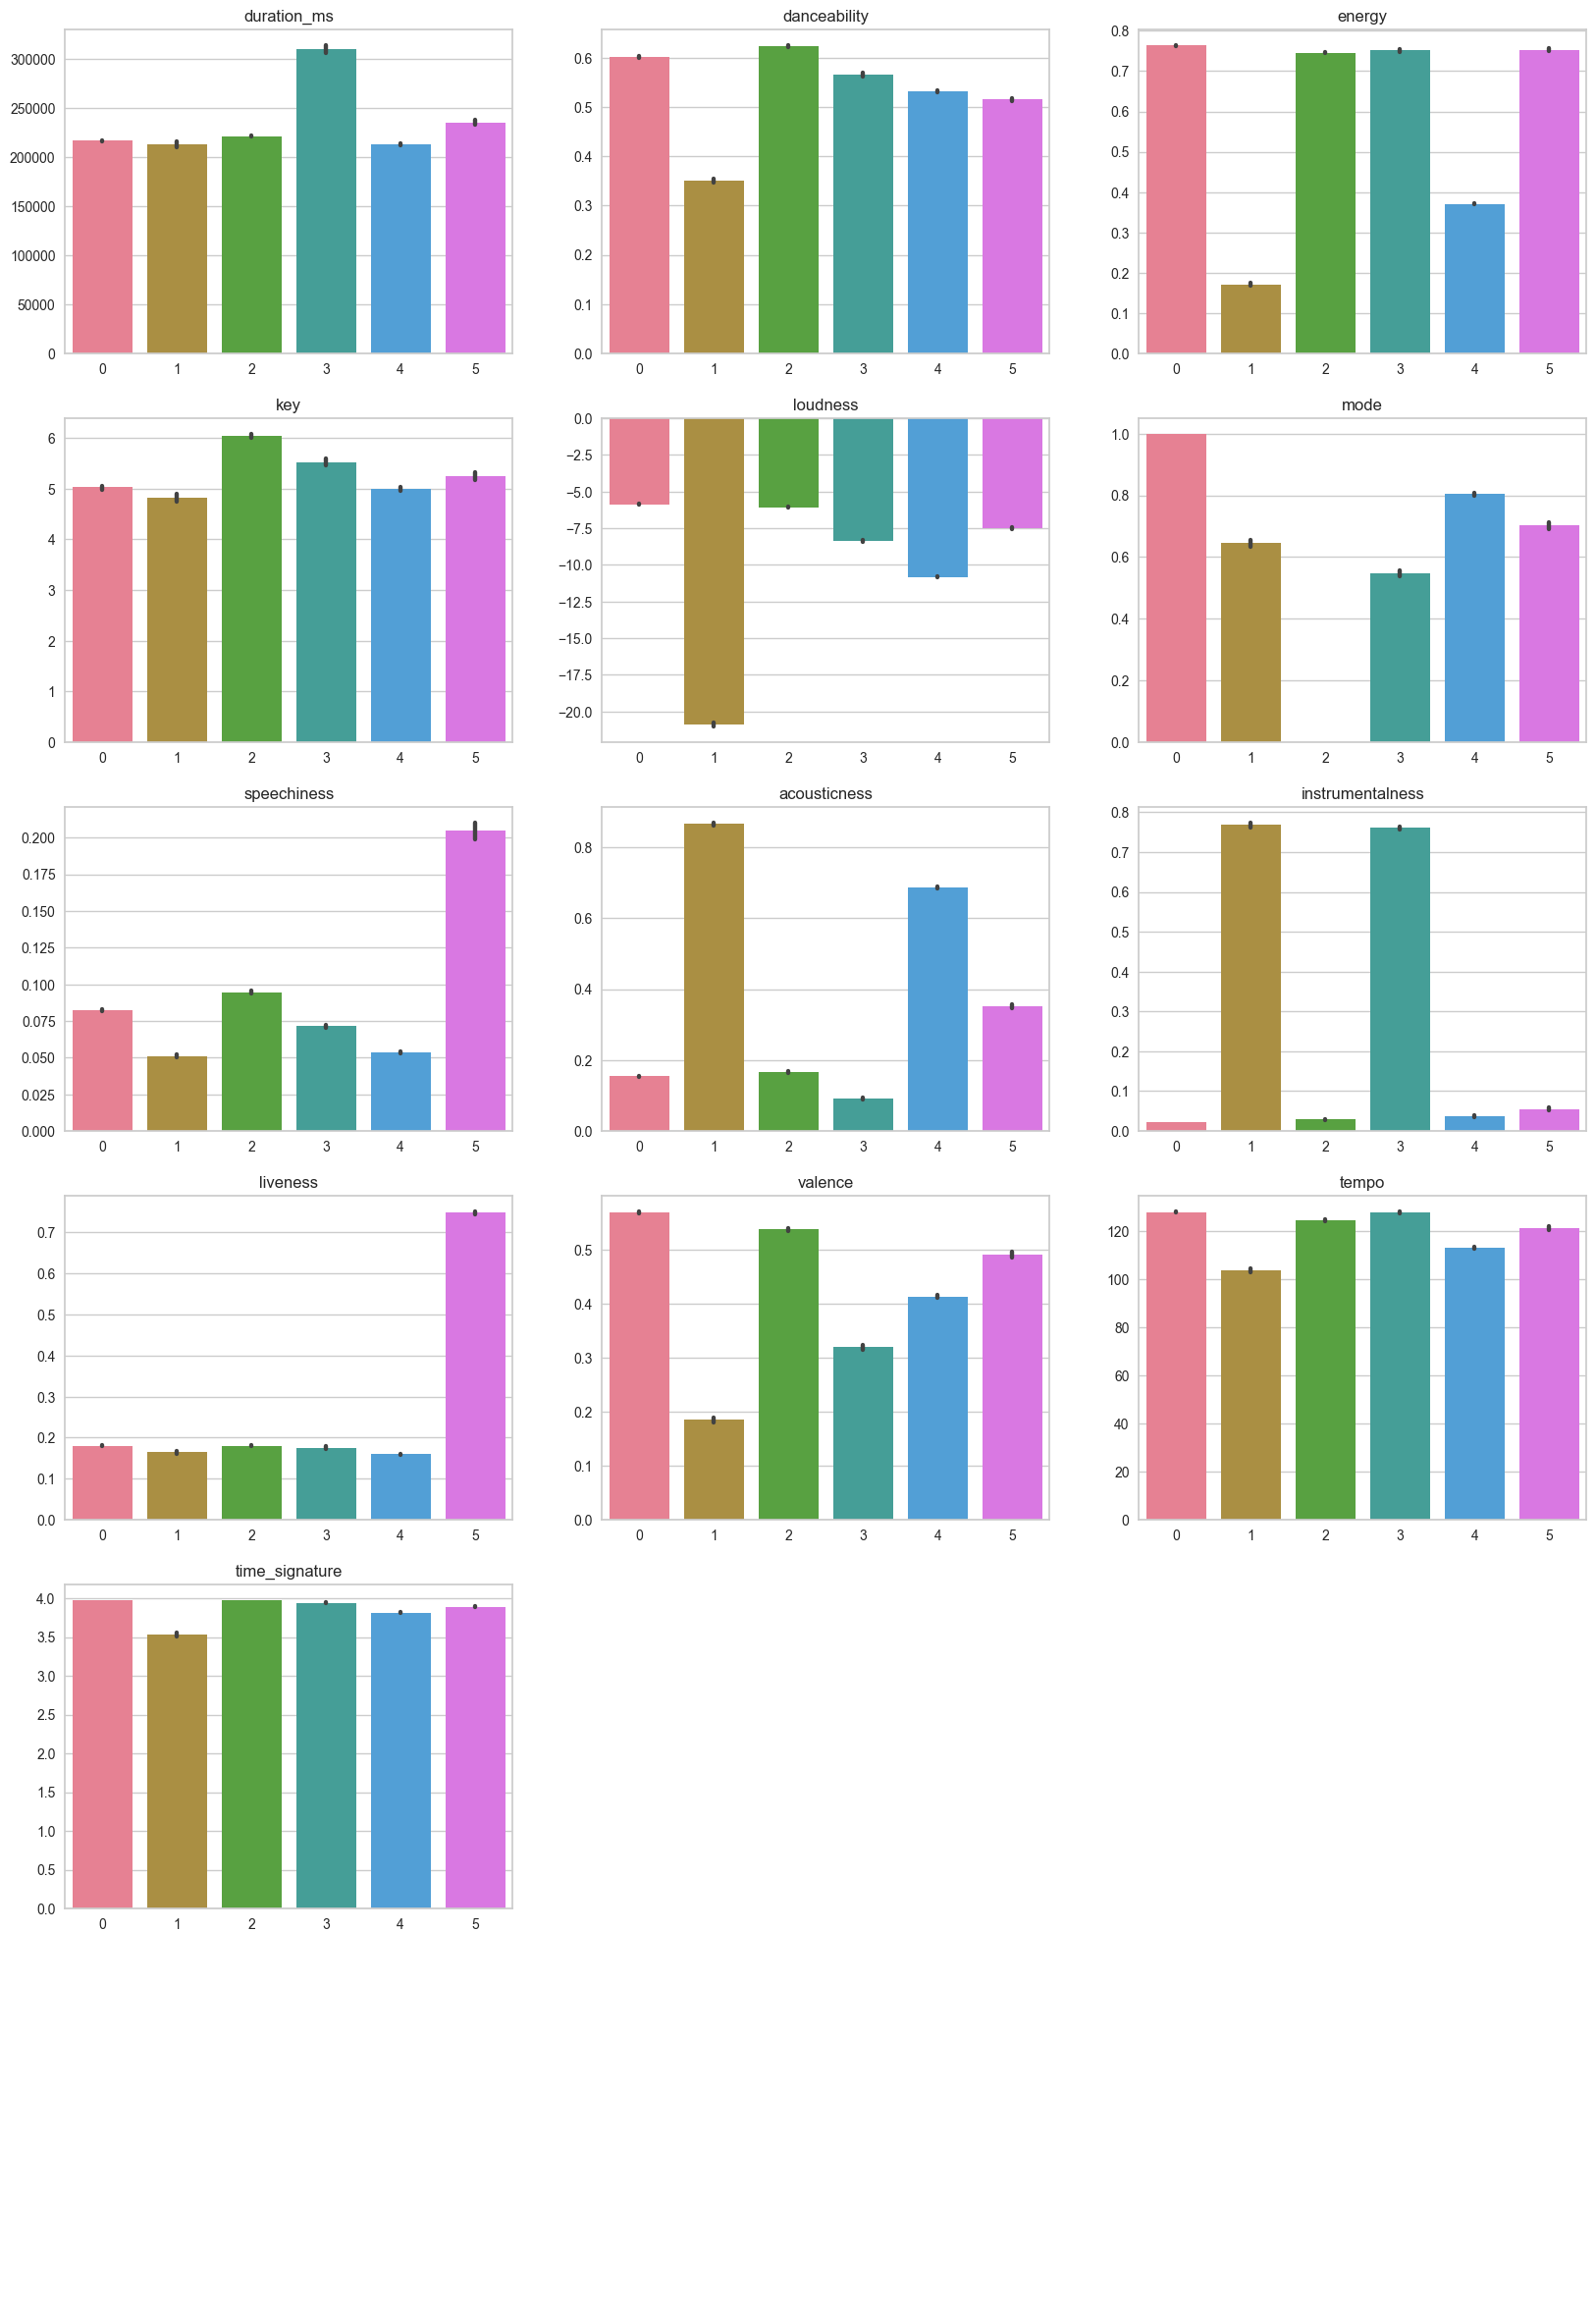

In [181]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

var_lst = df_orig.select_dtypes("number").columns

rows = 6
cols = math.ceil(len(var_lst) / rows)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 5 * rows))

for i, ax in zip(var_lst, axs.flat):
    sns.barplot(data=df, x="cluster", y=i, ax=ax, palette="husl")
    ax.set(xlabel='', ylabel='', title=i)

for i in axs.flat[::-1][:rows * cols - len(var_lst)]:
    i.set_axis_off()

plt.show()


# Cluster 0: High energy, danceability, loudness. Highest mode (major) High tempo, Valence
# Cluster 0: Happy club music - techno, pop

# CLuster 1: Melancholic singer-songwriter, like Winnerbäck. Calm, melancholic, lower and more acoustic

# Cluster 2: All played completely in minor
# CLuster 2: Like 0 but played in minor, slightly higher speechiness. Could include rap for example

# Cluster 3: Instrumental house, techno. High danceability, no vocals, high energy, high loudness

# CLuster 4: Acoustic. Low energy, acoustic, not so loud

# CLuster 5: Live recordings, high energy

In [ ]:
# Conclusions about the clusters

# Cluster 1: Acoustic, mellow, low danceability, not loud. Acoustic ballads
# Cluster 2: Highest danceability and key. High energy and loud. High valence(happy)

In [45]:
df.cluster.value_counts()

cluster
0    37927
2    26544
4    22193
3    11901
5     7796
1     7638
Name: count, dtype: int64

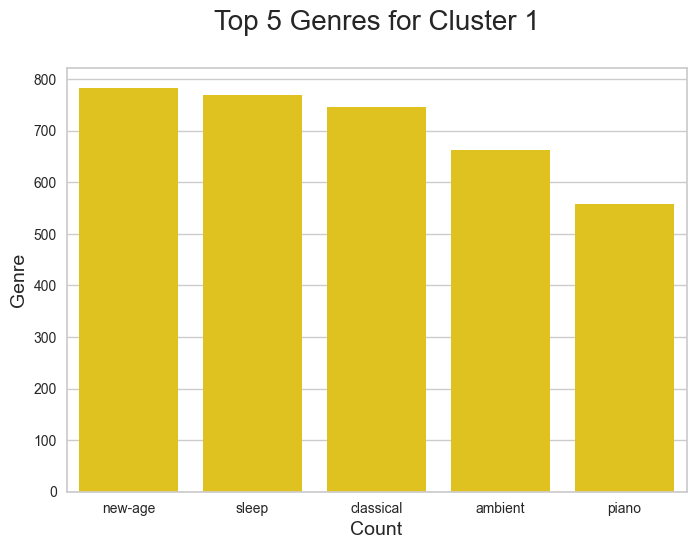

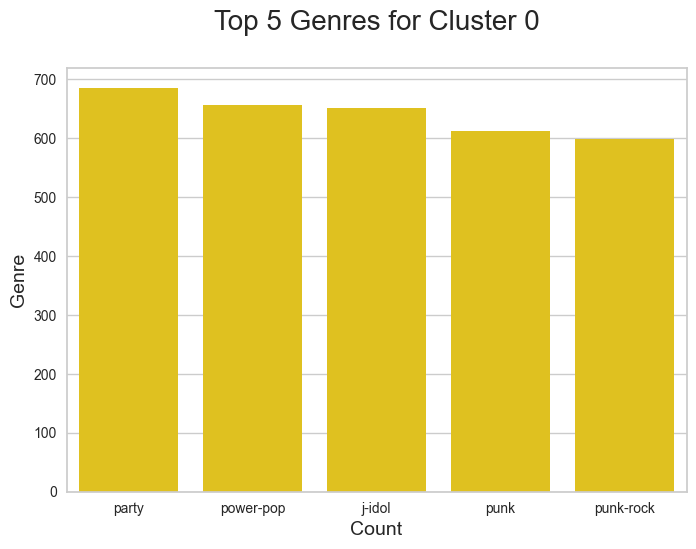

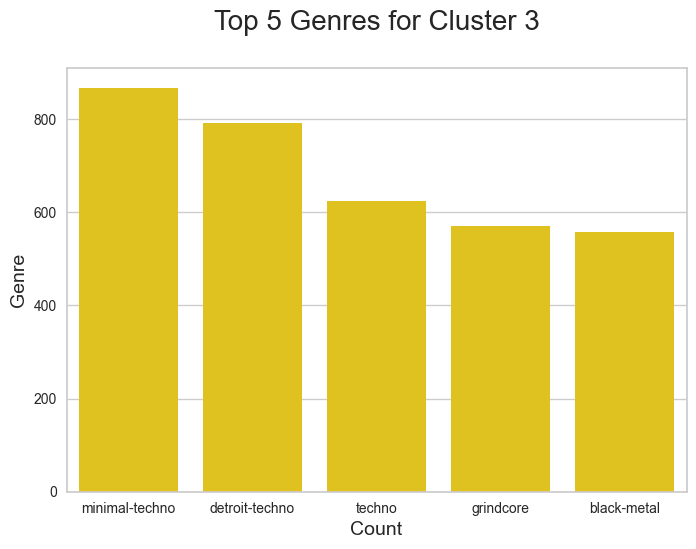

<Figure size 800x550 with 0 Axes>

In [114]:
# Plotting top 5 most common genres for each cluster

for cluster in df["cluster"].unique():
    df_plot = pd.DataFrame(df.loc[df["cluster"] == cluster]["track_genre"].value_counts().head(5))
    df_plot.reset_index(inplace = True)

    sns.barplot(data = df_plot, x = df_plot["track_genre"], y = df_plot["count"], color = 'gold')
    plt.title(f"Top 5 Genres for Cluster {cluster}\n", size = 20)
    plt.ylabel("Genre", size = 14)
    plt.xlabel("Count", size = 14)
    plt.show()
    plt.savefig(f"top_5_cluster_{cluster}.png", transparent = True)

In [ ]:
for i in df["cluster"].unique():
    top_5 = df[]

# Supervised Learning

In [115]:
df

artists   
0                  Gen Hoshino  \
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name   
0                                                  Comedy  \
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit   
0                           Comedy          73       230666     False  \
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  ...       PC2       PC3   
0              0.676  0.4610    1    -6.746  ... -0.883394 -0.385909  \
1              0.420  0.1660    1   -17.235  ... -1.466159 -0.446618   
2              0.438  0.3590    0    -9.734  ...  0.013778 -0.066629   
3              0.266  0.0596    0   -18.515  ...  0.309624 -1.058356   
4              0.618  0.4430    2    -9.681  ... -0.442034  0.249264   
...              ...     ...  ...       ...  ...       ...       ...   
113995         0.172  0.2350    5   -16.393  ...  1.680788  0.912574   
113996         0.174  0.1170    0   -18.318  ... -1.480533  0.713918   
113997         0.629  0.3290    0   -10.895  ... -0.049799  0.083863   
113998         0.587  0.5060    7   -10.889  ... -1.307103  0.393718   
113999         0.526  0.4870    1   -10.204  ...       NaN       NaN   

             PC4       PC5       PC6       PC7       PC8       PC9      PC10   
0       0.681487  1.381532  0.433906 -1.237914 -0.252975  1.003340 -0.264823  \
1      -0.941297  0.665833  0.086371 -0.129304 -0.915303  0.338229  1.057153   
2      -1.325643  1.045587  0.770699 -0.711609 -1.141764 -0.131774  1.279048   
3      -2.044173 -1.723974 -1.043008 -0.517323  1.369757  1.302583  0.649308   
4      -1.164112  0.313246 -0.194144 -0.201698 -0.290658  0.008483  1.017289   
...          ...       ...       ...       ...       ...       ...       ...   
113995  0.430074  1.734767 -0.520277 -0.716722 -0.405633  1.064474  0.019732   
113996 -0.200442  0.458807 -0.641452 -0.724655  0.782243  2.224139  0.050241   
113997 -0.431638 -0.155997  0.146272  1.216759  0.318969  0.276282  0.064202   
113998  0.296957  0.903619  0.503296 -1.081890 -0.259445  1.395403  0.342122   
113999       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        cluster  
0             2  
1             4  
2             4  
3             1  
4             4  
...         ...  
113995        1  
113996        1  
113997        4 

In [149]:
df_s = df.drop(columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "cluster"])

In [150]:
df_s

artists   
0                  Gen Hoshino  \
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name   
0                                                  Comedy  \
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit   
0                           Comedy          73       230666     False  \
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness   
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322  \
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature   
0               0.000001    0.3580   0.7150   87.917               4  \
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  
0          acoustic  
1          acoustic  
2          acoustic  
3          acoustic  
4          acoustic  
...             ...  
113995  world-music  
11

# Cleaning the data for supervised learning

In [132]:
# df_s.drop(columns = ["artists", "album_name", "track_name", "track_genre"], inplace = True)

# X and y

In [154]:
X = df_s.drop(columns = "popularity")
y = df_s["popularity"]

In [155]:
X

artists   
0                  Gen Hoshino  \
1                 Ben Woodward   
2       Ingrid Michaelson;ZAYN   
3                 Kina Grannis   
4             Chord Overstreet   
...                        ...   
113995           Rainy Lullaby   
113996           Rainy Lullaby   
113997           Cesária Evora   
113998        Michael W. Smith   
113999           Cesária Evora   

                                               album_name   
0                                                  Comedy  \
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  duration_ms  explicit  danceability   
0                           Comedy       230666     False         0.676  \
1                 Ghost - Acoustic       149610     False         0.420   
2                   To Begin Again       210826     False         0.438   
3       Can't Help Falling In Love       201933     False         0.266   
4                          Hold On       198853     False         0.618   
...                            ...          ...       ...           ...   
113995         Sleep My Little Boy       384999     False         0.172   
113996            Water Into Light       385000     False         0.174   
113997              Miss Perfumado       271466     False         0.629   
113998                     Friends       283893     False         0.587   
113999                   Barbincor       241826     False         0.526   

        energy  key  loudness  mode  speechiness  acousticness   
0       0.4610    1    -6.746     0       0.1430        0.0322  \
1       0.1660    1   -17.235     1       0.0763        0.9240   
2       0.3590    0    -9.734     1       0.0557        0.2100   
3       0.0596    0   -18.515     1       0.0363        0.9050   
4       0.4430    2    -9.681     1       0.0526        0.4690   
...        ...  ...       ...   ...          ...           ...   
113995  0.2350    5   -16.393     1       0.0422        0.6400   
113996  0.1170    0   -18.318     0       0.0401        0.9940   
113997  0.3290    0   -10.895     0       0.0420        0.8670   
113998  0.5060    7   -10.889     1       0.0297        0.3810   
113999  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature   
0               0.000001    0.3580   0.7150   87.917               4  \
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  
0          acoustic  
1          acoustic  
2          acoustic  
3          acoustic  
4          acoustic  
...             ...  
113995  world-music  
113996  world-music  
113997  world-music  
113998  world-music  
113999  world-music  

[113999 rows x 18 columns]

# Train test split

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

# Creating a pipeline & Trying models

In [157]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

In [158]:
cat_cols = ["artists", "album_name", "track_name", "track_genre"]
num_cols = X.drop(columns = cat_cols).columns

In [166]:
# installing category_encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [169]:
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder

# Setting number of folds for cross-validation
n_splits = 5

# Initialize the target encoder
target_encoder = TargetEncoder()

In [171]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder


models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), GradientBoostingRegressor(),
         RandomForestRegressor()]

cat_cols = ["artists", "album_name", "track_name", "track_genre"]
num_cols = X.drop(columns = cat_cols).columns

cat_trans = TargetEncoder()
num_trans = StandardScaler()

preprocessor = make_column_transformer((num_trans, num_cols), (cat_trans, cat_cols))

for model in models:
    pipe = make_pipeline(preprocessor, model)
    grid = GridSearchCV(estimator = pipe, cv = 5, scoring = 'r2', param_grid = {})
    grid.fit(X_train, y_train)
    score = grid.best_score_
    
    print(f"Model: {model}, r-squared: {score}")




Model: LinearRegression(), r-squared: 0.6210188965136639
Model: Ridge(), r-squared: 0.6210188997314017
Model: Lasso(), r-squared: 0.6124365753890292
Model: DecisionTreeRegressor(), r-squared: 0.6464376842678621
Model: GradientBoostingRegressor(), r-squared: 0.7127703319629624
Model: RandomForestRegressor(), r-squared: 0.7342685487635168


In [172]:
# Randomforestregressor and GradientBoostingRegressor are significantly better than the rest

# Hyperparameter tuning

In [173]:
from sklearn.model_selection import GridSearchCV

In [175]:
# Creating parameter grids

param_grid_rf = {'randomforestregressor__max_depth': [None, 5, 10, 20],
                'randomforestregressor__n_estimators': [50, 100, 200, 500]}

param_grid_gb = {'gradientboostingregressor__n_estimators': [50, 100, 200, 500],
                'gradientboostingregressor__learning_rate': [0.01, 0.05, 0.1, 0.2]}

# Creating a pipe

pipe_rf = make_pipeline(preprocessor, RandomForestRegressor())
grid_rf = GridSearchCV(estimator = pipe_rf, param_grid = param_grid_rf, cv = 5, scoring = 'r2')

pipe_gb = make_pipeline(preprocessor, GradientBoostingRegressor())
grid_gb = GridSearchCV(estimator = pipe_gb, param_grid = param_grid_gb, cv = 5, scoring = 'r2')

grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

results_rf = grid_rf.cv_results_
results_gb = grid_gb.cv_results_

for results in [results_rf, results_gb]:
    for mean_score, mean_fit_time, params in zip(results['mean_test_score'], 
                                                 results['mean_fit_time'], results['params']):
        print(f"Score: {mean_score:.4f}, Fit Time: {mean_fit_time:.4f} seconds, Params: {params}")


Score: 0.7359, Fit Time: 44.6511 seconds, Params: {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 50}
Score: 0.7357, Fit Time: 256.0923 seconds, Params: {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 100}
Score: 0.7352, Fit Time: 194.9107 seconds, Params: {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 200}
Score: 0.7357, Fit Time: 732.5273 seconds, Params: {'randomforestregressor__max_depth': None, 'randomforestregressor__n_estimators': 500}
Score: 0.7021, Fit Time: 15.5069 seconds, Params: {'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 50}
Score: 0.7014, Fit Time: 30.3989 seconds, Params: {'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 100}
Score: 0.7014, Fit Time: 59.9371 seconds, Params: {'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 200}
Score: 0.7014, Fit Time: 211.4490 seconds, Params

In [176]:
grid_rf.best_score_

0.7359233872292643

In [177]:
grid_rf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__n_estimators': 50}

In [180]:
grid_rf.cv_results_

{'mean_fit_time': array([ 44.65106535, 256.09233565, 194.91070585, 732.52725344,
         15.50691504,  30.39890227,  59.93713183, 211.44897766,
         28.89241939,  56.6344717 , 112.3554143 , 297.43461571,
         42.58353019,  84.45178037, 589.89881473, 257.6207345 ]),
 'std_fit_time': array([1.45726564e-01, 3.36054163e+02, 3.96571894e+01, 5.63347839e+02,
        3.39698955e-02, 4.23247945e-02, 6.48719359e-02, 1.23301094e+02,
        3.24814860e-01, 1.08675284e-01, 4.85844255e-01, 3.41031320e+01,
        1.32162241e-01, 3.98194679e-01, 8.43000267e+02, 7.76437983e-01]),
 'mean_score_time': array([0.255024  , 0.43293338, 0.80780778, 2.1002502 , 0.10995145,
        0.15466976, 0.24778795, 0.65194554, 0.15146222, 0.22351904,
        0.37727957, 0.87582335, 0.22974563, 0.39489899, 0.74634857,
        1.11097808]),
 'std_score_time': array([0.00662132, 0.01501688, 0.0288995 , 0.03217166, 0.0015207 ,
        0.00115406, 0.00897409, 0.25017941, 0.00625932, 0.00350963,
        0.00747776, 

In [182]:
# Therefore i choose Random forest regressor with max_depth = None and n_estimators = 50

# Testing the model

In [183]:
model = RandomForestRegressor(n_estimators = 50, max_depth = None)
pipe = make_pipeline(preprocessor, model)

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')),
                                                 ('targetencoder',
                                                  TargetEncoder(),
                                                  ['artists', 'album_name',
                                                   'track_name',
                                                   'track_genre'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [188]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = pipe.predict(X_test)
y_true = y_test

mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

In [186]:
mae

6.871126968462823

In [189]:
r2

0.7611599939242306